<a href="https://colab.research.google.com/github/alexanderportilla96/Sy2025II/blob/main/Copia_de_solucion_parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PARCIAL 1 SYS**

## **Arthur Alexander Portilla**
# 1088596640


---


## Las Librerías para Procesamiento de Señales

| Librería | Lo Mejor / Uso Crucial |
| :--- | :--- |
| **NumPy** | Es el **fundamento**; permite el **manejo rápido y vectorial de señales** (arreglos) y realiza cálculos esenciales como la **FFT** (Transformada Rápida de Fourier). |
| **SymPy** | Excelente para el **análisis simbólico** (algebraico) de ecuaciones. Útil para **modelar sistemas y derivadas/integrales** antes de la implementación numérica. |
| **Matplotlib.pyplot** | El estándar para la **visualización**. Permite **graficar señales** en el dominio del tiempo y la frecuencia (espectros). |
| **scipy.signal.convolve** | Herramienta clave para la **aplicación de filtros**. La convolución es la operación que define cómo un filtro interactúa con una señal. |
| **scipy.spatial.distance.cdist** | Fundamental en **cuantización** y análisis de datos. Calcula **distancias** para encontrar el nivel más cercano en procesos de discretización. |



En resumen: **NumPy** es el motor para los datos, **Matplotlib** es el ojo para la visualización, y **SciPy** (con `signal` y `spatial`) proporciona las herramientas avanzadas para **filtrar y cuantizar** la señal.





# Ejercicio 1

La distancia $d(x_1, x_2)$ entre dos señales periódicas $x_1(t)$ y $x_2(t)$ se define como la raíz cuadrada de la energía promedio de la diferencia de las señales sobre un periodo, también conocida como la distancia cuadrática media. Matemáticamente, se expresa como:

$$d^2(x_1, x_2) = P_{\overline{x_1-x_2}} = \lim_{T\to\infty} \frac{1}{T} \int_{-T/2}^{T/2} |x_1(t) - x_2(t)|^2 dt$$

Si las señales son armónicos complejos de una misma frecuencia fundamental $w_0$, es decir $x_1(t) = A e^{-j n w_0 t}$ y $x_2(t) = B e^{j m w_0 t}$, la distancia se puede calcular de forma analítica.



Distancia analítica = 5.0000
Distancia numérica  = 5.0000
Distancia analítica = 5.0000
Distancia numérica  = 5.0000


/tmp/ipython-input-2100535120.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  d2_num = np.trapz(np.abs(diff)**2, t) / T
/tmp/ipython-input-2100535120.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  d2_num = np.trapz(np.abs(diff)**2, t) / T


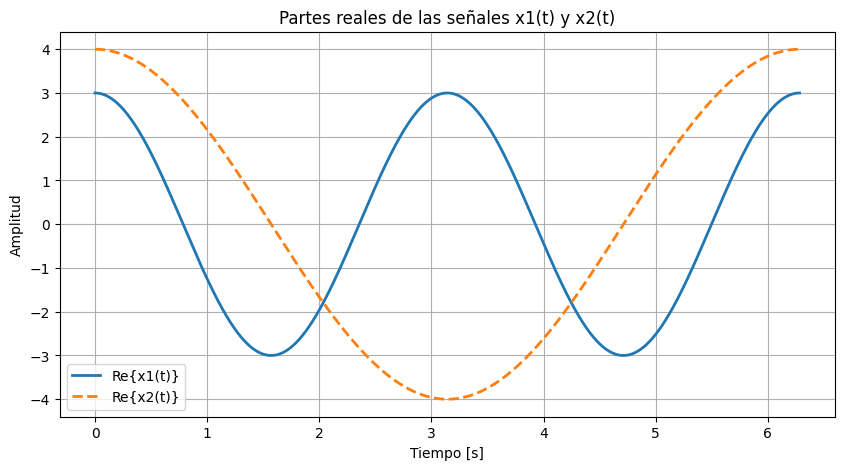

In [22]:
# Importamos librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de las señales
A = 3          # Amplitud de x1(t)
B = 4          # Amplitud de x2(t)
n = 2          # Armónico de x1(t)
m = 1          # Armónico de x2(t)
T = 2 * np.pi  # Periodo fundamental (puede ser cualquier valor positivo)
w0 = 2 * np.pi / T  # Frecuencia angular fundamental

# Vector de tiempo: un periodo completo
t = np.linspace(0, T, 5000)

# Definimos las señales complejas
x1 = A * np.exp(-1j * n * w0 * t)
x2 = B * np.exp(1j * m * w0 * t)

# Calculamos la diferencia
diff = x1 - x2


# Distancia numérica mediante integración (energía promedio)
d2_num = np.trapz(np.abs(diff)**2, t) / T
d_num = np.sqrt(d2_num)

# Distancia analítica según el caso
if n + m == 0:
    d_anal = abs(A - B)
else:
    d_anal = np.sqrt(A**2 + B**2)

# Mostramos resultados
print(f"Distancia analítica = {d_anal:.4f}")
print(f"Distancia numérica  = {d_num:.4f}")




# Distancia numérica mediante integración (energía promedio)
d2_num = np.trapz(np.abs(diff)**2, t) / T
d_num = np.sqrt(d2_num)

# Distancia analítica según el caso
if n + m == 0:
    d_anal = abs(A - B)
else:
    d_anal = np.sqrt(A**2 + B**2)

# Mostramos resultados
print(f"Distancia analítica = {d_anal:.4f}")
print(f"Distancia numérica  = {d_num:.4f}")




# Parte real de las señales (para visualizarlas en el tiempo)
plt.figure(figsize=(10,5))
plt.plot(t, np.real(x1), label='Re{x1(t)}', linewidth=2)
plt.plot(t, np.real(x2), label='Re{x2(t)}', linewidth=2, linestyle='--')
plt.title('Partes reales de las señales x1(t) y x2(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()




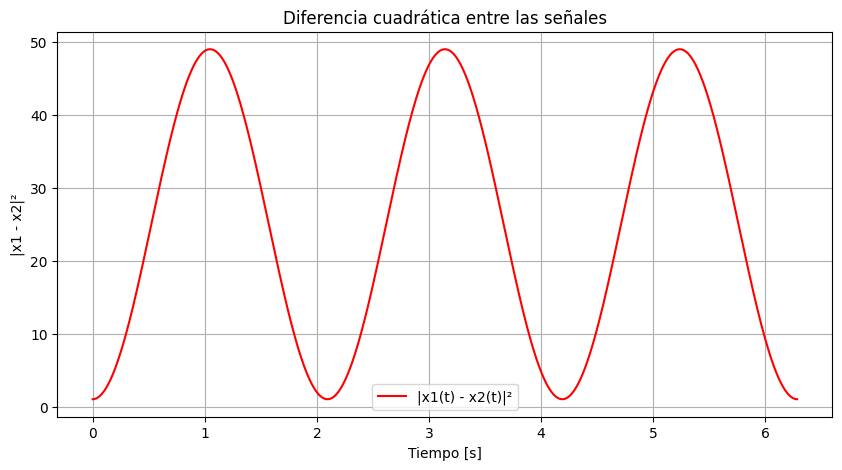

In [23]:
# Magnitud cuadrática de la diferencia
plt.figure(figsize=(10,5))
plt.plot(t, np.abs(diff)**2, color='red', label='|x1(t) - x2(t)|²')
plt.title('Diferencia cuadrática entre las señales')
plt.xlabel('Tiempo [s]')
plt.ylabel('|x1 - x2|²')
plt.legend()
plt.grid(True)
plt.show()


---
# **Ejercicio 2.**
Encuentre la senal en tiempo discreto al utilizar un conversor
analogo digital con frecuencia de muestreo de 5kHz y 4 bits
de capacidad de representacion, aplicado a la señal continua:

x(t) = 3 cos(1000πt) + 5 sin(3000πt) + 10 cos(11000πt).

Realizar la simulacion del proceso de discretizacion (incluyendo al menos tres periodos de x(t)). En caso de que la discretizacion no sea apropiada, diseñe implemente un conversor adecuado para la senal estudiada.


Paso 1. Definir la señal continua
𝑥
(
𝑡
)
x(t)



La señal tiene tres componentes:

𝑓1=500

Hz

𝑓
2
=1500Hz

𝑓
3=5500Hz

Por lo tanto:


x(t)=3cos(2π⋅500t)+5sin(2π⋅1500t)+10cos(2π⋅5500t)



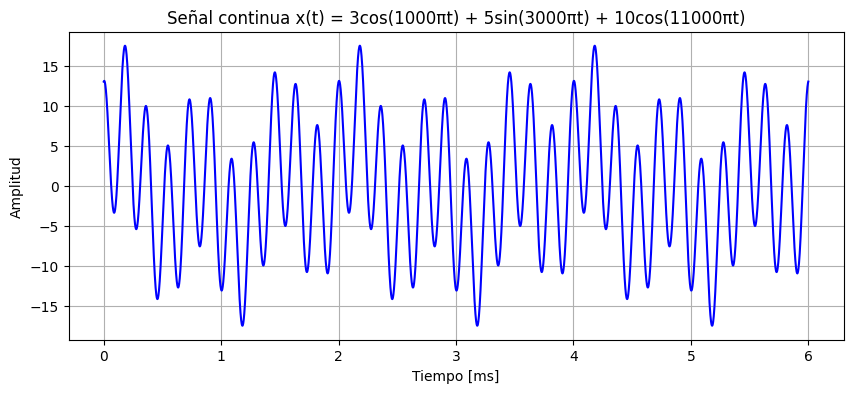

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Frecuencias y amplitudes
A1, f1 = 3.0, 500.0
A2, f2 = 5.0, 1500.0
A3, f3 = 10.0, 5500.0

# Periodo fundamental (múltiplo de 500 Hz)
T0 = 1 / 500
t = np.linspace(0, 3*T0, 5000)  # tiempo continuo (alta resolución)

# Señal continua x(t)
x_cont = A1*np.cos(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.cos(2*np.pi*f3*t)

# Gráfica de la señal continua
plt.figure(figsize=(10,4))
plt.plot(t*1000, x_cont, color='blue')
plt.title("Señal continua x(t) = 3cos(1000πt) + 5sin(3000πt) + 10cos(11000πt)")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

#La señal total es la superposición de esas tres ondas, y por eso se ve “rugosa” (las altas frecuencias producen pequeñas ondulaciones sobre la señal base).


Muestreo a f_s= 5kHz
Concepto

	- Frecuencia de muestreo: f_s=5000Hz → T_s=1/5000=0.0002s

	- El criterio de Nyquist dice: f_s > 2f_max
       f_max =5500=Hz
	     2f_max =11000>5000❌ → habrá aliasing.


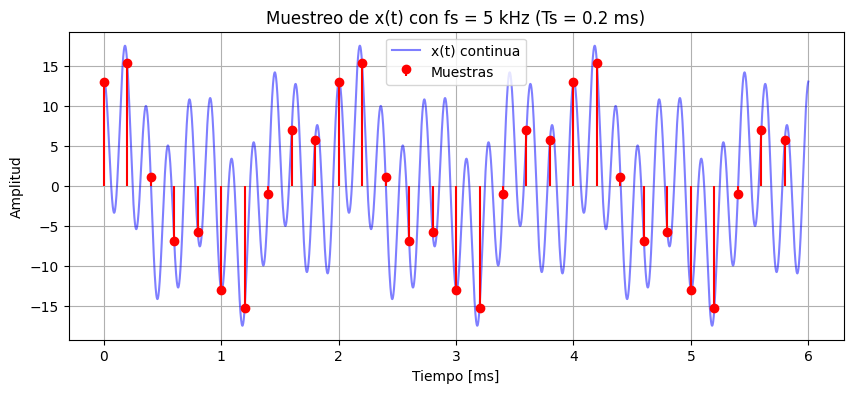

In [25]:
# Frecuencia de muestreo
fs = 5000
Ts = 1 / fs
t_samp = np.arange(0, 3*T0, Ts)

# Señal muestreada
x_samp = A1*np.cos(2*np.pi*f1*t_samp) + A2*np.sin(2*np.pi*f2*t_samp) + A3*np.cos(2*np.pi*f3*t_samp)

# Graficar muestreo
plt.figure(figsize=(10,4))
plt.plot(t*1000, x_cont, 'b', alpha=0.5, label="x(t) continua")
plt.stem(t_samp*1000, x_samp, linefmt='r-', markerfmt='ro', basefmt=" ", label="Muestras")
plt.title("Muestreo de x(t) con fs = 5 kHz (Ts = 0.2 ms)")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


	- La línea azul es la señal continua (referencia).
	- Los puntos rojos son los valores muestreados por el ADC.
	- Como f_3=5500Hz>f_s/2=2500Hz, la componente de alta frecuencia se pliega (alias) sobre la de 500 Hz.
	- Por eso, la secuencia muestreada parece una señal más simple de baja frecuencia — el alias hace que el contenido real de 5500 Hz se confunda con 500 Hz.

Verificación del aliasing matemáticamente
Concepto
La componente de 5500 Hz se pliega a:

f_3^'= ∣f_3-f_s∣=∣5500-5000∣=500Hz

Entonces, dentro de las muestras:

3cos⁡(2π⋅500t)+10cos⁡(2π⋅5500t)⇒ (3+10)cos⁡(2π⋅500t)

Es decir, se suman las amplitudes.




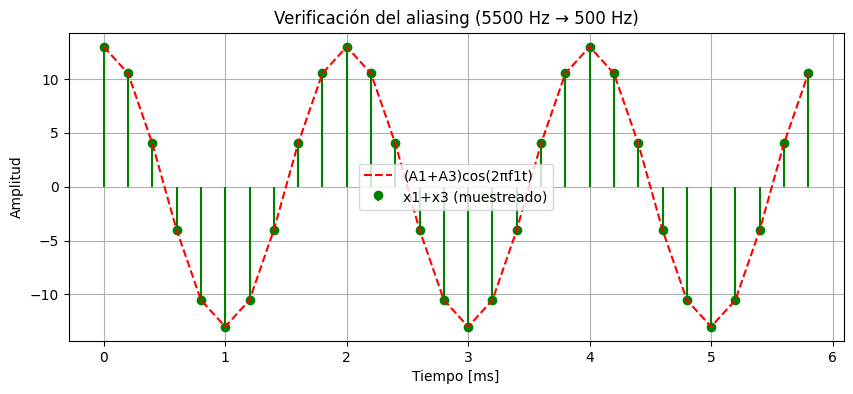

In [26]:
# Suma de las dos componentes que se pliegan
sum_13 = A1*np.cos(2*np.pi*f1*t_samp) + A3*np.cos(2*np.pi*f3*t_samp)
theoretical_sum = (A1 + A3) * np.cos(2*np.pi*f1*t_samp)

plt.figure(figsize=(10,4))
plt.stem(t_samp*1000, sum_13, linefmt='g-', markerfmt='go', basefmt=" ", label="x1+x3 (muestreado)")
plt.plot(t_samp*1000, theoretical_sum, 'r--', label="(A1+A3)cos(2πf1t)")
plt.title("Verificación del aliasing (5500 Hz → 500 Hz)")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


Los puntos verdes muestran la suma real de las componentes 500 Hz + 5500 Hz.

La línea roja discontinua es la onda equivalente de (A1+A3)cos⁡(2πf1t).

Se observa que coinciden perfectamente → el alias es total: la componente de 5500 Hz “se camufla” como otra de 500 Hz.


Cuantización (4 bits)

Un ADC de 4 bits → 2^4=16niveles posibles.
Se define el rango del convertidor:

	V_ref =1.1⋅max⁡∣x[n]∣

	Paso de cuantización:
	Δ=(2V_ref )/16

	Cada muestra se redondea al múltiplo de Δ más cercano.

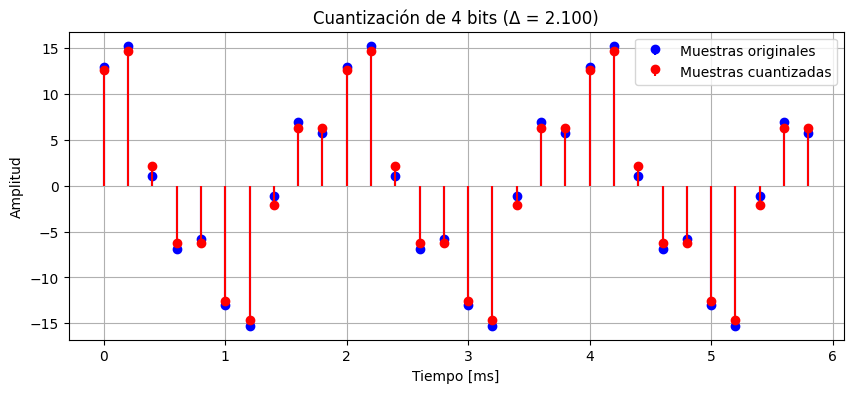

In [27]:
# Cuantización uniforme de 4 bits
L = 16
Vref = 1.1 * np.max(np.abs(x_samp))
Delta = 2*Vref / L

def quantize(x, Delta):
    return Delta * (np.floor(x/Delta + 0.5))

xq = quantize(x_samp, Delta)
error = x_samp - xq

plt.figure(figsize=(10,4))
plt.stem(t_samp*1000, x_samp, linefmt='b-', markerfmt='bo', basefmt=" ", label="Muestras originales")
plt.stem(t_samp*1000, xq, linefmt='r-', markerfmt='ro', basefmt=" ", label="Muestras cuantizadas")
plt.title("Cuantización de 4 bits (Δ = %.3f)" % Delta)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


	Los puntos azules: muestras originales antes de cuantizar.
	Los puntos rojos: valores cuantizados (después del ADC).
	Se observa que los valores rojos están discretizados en “escalones” → pérdida de precisión.
	Entre ambos hay un pequeño error e[n]→ ruido de cuantización.


Mejorar el conversor (dos opciones)


Dado que f_s=5kHz produce aliasing, hay dos soluciones:

Usar un filtro antialias que elimine la componente de 5500 Hz antes del ADC.

→ Se pierde esa información, pero no hay aliasing.


Aumentar f_sa un valor mayor que 2f_max.
→ Elegimos f_s=12kHz.


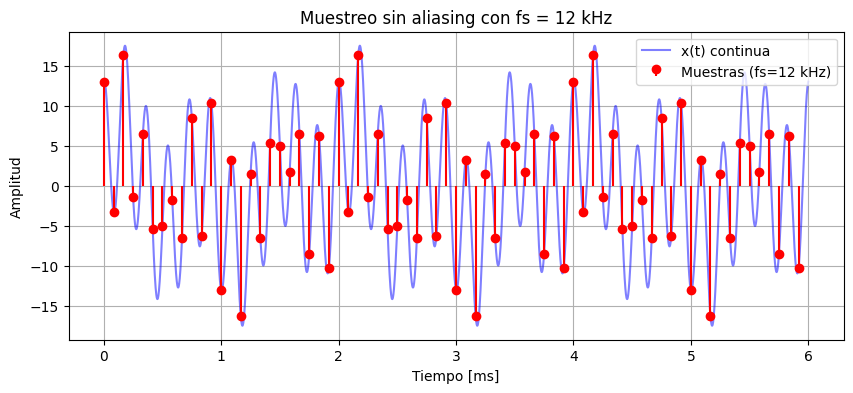

In [28]:
fs2 = 12000
Ts2 = 1 / fs2
t_samp2 = np.arange(0, 3*T0, Ts2)
x_samp2 = A1*np.cos(2*np.pi*f1*t_samp2) + A2*np.sin(2*np.pi*f2*t_samp2) + A3*np.cos(2*np.pi*f3*t_samp2)

plt.figure(figsize=(10,4))
plt.plot(t*1000, x_cont, 'b', alpha=0.5, label="x(t) continua")
plt.stem(t_samp2*1000, x_samp2, linefmt='r-', markerfmt='ro', basefmt=" ", label="Muestras (fs=12 kHz)")
plt.title("Muestreo sin aliasing con fs = 12 kHz")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


	Al aumentar la frecuencia de muestreo, los puntos rojos siguen la forma de la señal mucho más de cerca.

	Ya no hay aliasing, porque f_s/2=6 kHz >5.5 kHz.
  
	La reconstrucción de la señal a partir de las muestras sería exacta si se aplica un filtro pasa-bajo ideal.


---
# Ejercicio 3

Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t \in [t_i, t_f]$.

Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular segun:

$$c_n = \frac{1}{[t_i, t_f]*n^2 \omega_0^2} d_n$$

donde $d_n$ son los coeficientes de la serie exponencial de Fourier de $x''(t)$, es decir:

$$d_n = \frac{1}{T} \int_{t_i}^{t_f} x''(t) e^{-j n \omega_0 t} dt$$

¿Como se puede calculae los coeficientes a_n y b_n desde x''(t) en la serie trigonometrica de Fourier?.

Comparación de coeficientes cn (directos vs desde x''):

n=-5 | c_n directo=-0.0030+0.0000j | c_n desde x''=-0.0002+0.0000j
n=-4 | c_n directo=-0.0030+0.0000j | c_n desde x''=-0.0004+0.0000j
n=-3 | c_n directo=-0.0030+0.0000j | c_n desde x''=-0.0007+0.0000j
n=-2 | c_n directo=-0.0030+1.0000j | c_n desde x''=-0.0015+1.0000j
n=-1 | c_n directo= 1.4970+0.0000j | c_n desde x''= 1.4941+0.0000j
n=+0 | c_n directo=-0.0030+0.0000j | c_n desde x''= 0.0000+0.0000j
n=+1 | c_n directo= 1.4970-0.0000j | c_n desde x''= 1.4941-0.0000j
n=+2 | c_n directo=-0.0030-1.0000j | c_n desde x''=-0.0015-1.0000j
n=+3 | c_n directo=-0.0030-0.0000j | c_n desde x''=-0.0007-0.0000j
n=+4 | c_n directo=-0.0030-0.0000j | c_n desde x''=-0.0004-0.0000j
n=+5 | c_n directo=-0.0030-0.0000j | c_n desde x''=-0.0002-0.0000j


/tmp/ipython-input-2903468287.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (1/T) * np.trapz(x * np.exp(-1j * n * w0 * t), t)
/tmp/ipython-input-2903468287.py:48: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(x_2dot * np.exp(-1j * n * w0 * t), t)


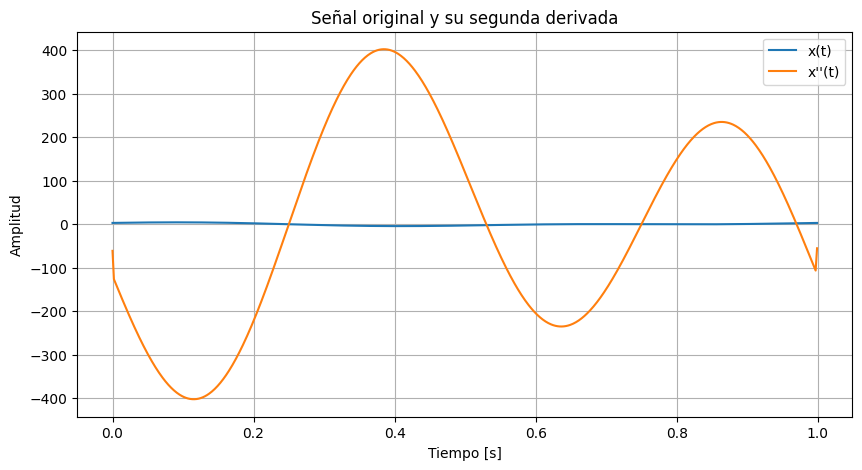

In [29]:
# ------------------------------------------------------------
# Cálculo de coeficientes de Fourier a partir de x''(t)
# Autor: (tu nombre)
# Curso: Señales y Sistemas
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Definimos la señal periódica x(t)
# ------------------------------------------------------------
# Elegimos un ejemplo sencillo y periódico:
# x(t) = 3*cos(ω0*t) + 2*sin(2*ω0*t)
# con ω0 = 2π/T y T = 1 s (frecuencia fundamental = 1 Hz)
# ------------------------------------------------------------
T = 1.0                    # periodo [s]
w0 = 2 * np.pi / T         # frecuencia angular fundamental [rad/s]
t = np.linspace(0, T, 1000, endpoint=False)  # 1000 puntos dentro de un periodo

x = 3 * np.cos(w0 * t) + 2 * np.sin(2 * w0 * t)  # señal original

# ------------------------------------------------------------
# 2. Calculamos la segunda derivada x''(t)
# ------------------------------------------------------------
# Derivamos numéricamente usando np.gradient dos veces
# (asumiendo muestreo uniforme)
# ------------------------------------------------------------
dt = t[1] - t[0]
x_2dot = np.gradient(np.gradient(x, dt), dt)

# ------------------------------------------------------------
# 3. Calculamos los coeficientes cn directos desde x(t)
# ------------------------------------------------------------
# Fórmula: c_n = (1/T) ∫ x(t) e^{-j n w0 t} dt
# ------------------------------------------------------------
def cn_direct(n):
    return (1/T) * np.trapz(x * np.exp(-1j * n * w0 * t), t)

# ------------------------------------------------------------
# 4. Calculamos los coeficientes cn desde x''(t)
# ------------------------------------------------------------
# Fórmula demostrada: c_n = -1/(T * n^2 * w0^2) * ∫ x''(t)e^{-j n w0 t} dt
# ------------------------------------------------------------
def cn_from_x2(n):
    if n == 0:
        return 0  # se evita división por cero
    integral = np.trapz(x_2dot * np.exp(-1j * n * w0 * t), t)
    return -(1/(T * (n**2) * (w0**2))) * integral

# ------------------------------------------------------------
# 5. Comparamos resultados para varios armónicos n
# ------------------------------------------------------------
N = 5  # número de armónicos a evaluar
n_values = np.arange(-N, N+1)

print("Comparación de coeficientes cn (directos vs desde x''):\n")
for n in n_values:
    c1 = cn_direct(n)
    c2 = cn_from_x2(n)
    print(f"n={n:+d} | c_n directo={c1.real:7.4f}{c1.imag:+7.4f}j | "
          f"c_n desde x''={c2.real:7.4f}{c2.imag:+7.4f}j")

# ------------------------------------------------------------
# 6. Visualización de la señal y su segunda derivada
# ------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(t, x, label='x(t)')
plt.plot(t, x_2dot, label="x''(t)")
plt.title('Señal original y su segunda derivada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


---
# Ejercicio 4

 Encuentre el espectro de Fourier, su parte real,imaginaria, magnitud, fase y el error relativo para n∈{0, ±1, ±2, ±3, ±4, ±5}, a partir de x (t) para la señal x(t) en la Figura 1.

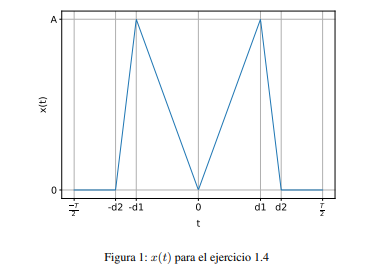

 Compruebe el espectro obtenido con la estimacion a partir de x(t). Presente las simulaciones de Python respectivas.

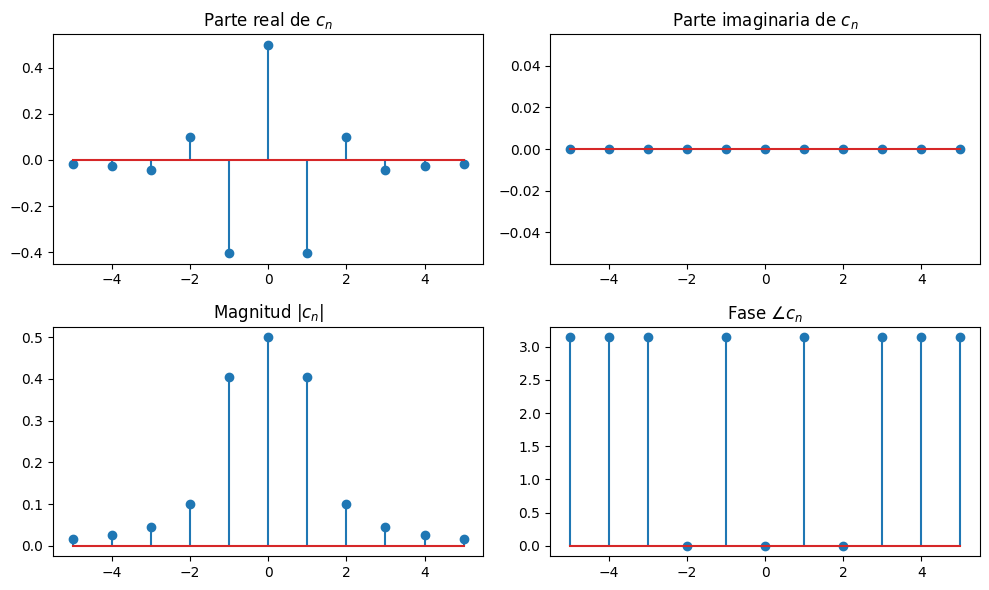

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A, d1, d2, T = 1, 1, 2, 4
w0 = 2*np.pi/T

# Armónicos
n = np.arange(-5, 6)
c = np.zeros_like(n, dtype=complex)

# Calcular c_n
for i, ni in enumerate(n):
    if ni == 0:
        c[i] = A * d2 / T
    else:
        c[i] = (2/(ni**2 * np.pi**2)) * (np.cos(ni*np.pi) - 2*np.cos(ni*np.pi/2) - 1)

# Partes del espectro
real_part = np.real(c)
imag_part = np.imag(c)
mag = np.abs(c)
phase = np.angle(c)

# Gráficas
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0,0].stem(n, real_part)
axs[0,0].set_title("Parte real de $c_n$")
axs[0,1].stem(n, imag_part)
axs[0,1].set_title("Parte imaginaria de $c_n$")
axs[1,0].stem(n, mag)
axs[1,0].set_title("Magnitud $|c_n|$")
axs[1,1].stem(n, phase)
axs[1,1].set_title("Fase ∠$c_n$")
plt.tight_layout()
plt.show()
